In [ ]:
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
from geopy.distance import great_circle
import matplotlib.pyplot as plt
import seaborn as sns
import math
import numpy as np
import copy

In [ ]:
data = pd.read_csv("C:/Users/subha/OneDrive/Documents/LOCATIONS.csv")
cab_details_df=pd.read_csv("CAB_DETAILS.csv")
emp_details_df=pd.read_csv("EMPLOYEES.csv")

In [ ]:
data.head()

,INDEX_ID,EMP_ID,OFFICE_LOCATION_LAT,OFFICE_LOCATION_LON,DROP_LOCATION_LAT,DROP_LOCATION_LON,AREA_NAME_EMP
0,1.0,VTS2025001,12.9775,80.2518,12.9750,80.2150,VELACHERRY
1,2.0,VTS2025002,12.9775,80.2518,12.9755,80.2155,VELACHERRY
2,3.0,VTS2025003,12.9775,80.2518,12.9760,80.2160,VELACHERRY
3,4.0,VTS2025004,12.9775,80.2518,12.9765,80.2165,VELACHERRY
4,5.0,VTS2025005,12.9775,80.2518,12.9770,80.2170,VELACHERRY


In [ ]:
data = data.drop(columns=['OFFICE_LOCATION_LAT','OFFICE_LOCATION_LON'])

In [ ]:
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
from geopy.distance import great_circle
import matplotlib.pyplot as plt
import seaborn as sns
import math
import numpy as np
import copy

In [ ]:
data = pd.read_csv("C:/Users/subha/OneDrive/Documents/LOCATIONS.csv")
cab_details_df=pd.read_csv("CAB_DETAILS.csv")
emp_details_df=pd.read_csv("EMPLOYEES.csv")

In [ ]:
data.head()

,INDEX_ID,EMP_ID,OFFICE_LOCATION_LAT,OFFICE_LOCATION_LON,DROP_LOCATION_LAT,DROP_LOCATION_LON,AREA_NAME_EMP
0,1.0,VTS2025001,12.9775,80.2518,12.9750,80.2150,VELACHERRY
1,2.0,VTS2025002,12.9775,80.2518,12.9755,80.2155,VELACHERRY
2,3.0,VTS2025003,12.9775,80.2518,12.9760,80.2160,VELACHERRY
3,4.0,VTS2025004,12.9775,80.2518,12.9765,80.2165,VELACHERRY
4,5.0,VTS2025005,12.9775,80.2518,12.9770,80.2170,VELACHERRY


In [ ]:
data = data.drop(columns=['OFFICE_LOCATION_LAT','OFFICE_LOCATION_LON'])

In [ ]:
data = data.dropna(how='all')
center_latitude = 12.9775
center_longitude = 80.2518
radius_km = 25

def is_within_radius(row, center_lat, center_lon, radius):
    center_point = (center_lat, center_lon)
    target_point = (row['DROP_LOCATION_LAT'], row['DROP_LOCATION_LON'])
    distance = great_circle(center_point, target_point).km
    return distance <= radius
data['within_radius'] = data.apply(is_within_radius, axis=1, center_lat=center_latitude, center_lon=center_longitude, radius=radius_km)
data = data[data['within_radius']]
data = data.drop(columns=['within_radius'])

data = data.rename(columns={'DROP_LOCATION_LAT':'Latitude','DROP_LOCATION_LON':'Longitude'})
df = copy.deepcopy(data)
df = df.drop(columns=['EMP_ID','INDEX_ID','AREA_NAME_EMP'])

In [ ]:
cabs_capacity=cab_details_df.CAPACITY.to_list()
cab_numbers = cab_details_df.CAB_NUMBER.to_list()
data = data.rename(columns={'DROP_LOCATION_LAT':'Latitude','DROP_LOCATION_LON':'Longitude'})
n_clusters=len(cabs_capacity)
count=len(cabs_capacity)
drop_lat = 12.9775
drop_long = 80.2518


In [ ]:
df

,Latitude,Longitude
0,12.975000,80.215000
1,12.975500,80.215500
2,12.976000,80.216000
3,12.976500,80.216500
4,12.977000,80.217000
...,...,...
495,12.933569,80.206975
496,12.936762,80.214132
497,12.937072,80.214163
498,12.937372,80.210373


In [ ]:
clustering_model = AgglomerativeClustering(n_clusters=n_clusters, linkage="ward")
clustering_model.fit(df)
labels = clustering_model.labels_
count=len(cabs_capacity)

In [ ]:
employee_data = {}
for i, (index, row) in enumerate(data.iterrows()):
    label = labels[i]
    if label not in employee_data:
        employee_data[label] = [[row['Latitude'], row['Longitude']]]
    else:
        employee_data[label].append([row['Latitude'], row['Longitude']])

In [ ]:
def haversine(lat1, lon1, lat2, lon2):
    lat1, lon1, lat2, lon2 = map(math.radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = math.sin(dlat / 2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon / 2)**2
    c = 2 * math.asin(math.sqrt(a))
    r = 6371
    return c * r

In [ ]:
def remove_indices(points, df):
    indices_to_remove_data = []
    for point in points:
        indices_data = df.index[(df['Latitude'] == point[0]) &
                                (df['Longitude'] == point[1])].tolist()
        indices_to_remove_data.extend(indices_data)
    return indices_to_remove_data

def cluster_form(df,count):
    employee_data = {}
    if len(df) ==0:
        return {}
    if len(df)<2:
        employee_data['1'] = [[df.iloc[0]['Latitude'], df.iloc[0]['Longitude']]]
        return employee_data
    n_clusters = max(1, math.ceil(len(df) / count))
    clustering_model = AgglomerativeClustering(n_clusters=n_clusters, linkage="ward")
    clustering_model.fit(df[['Latitude', 'Longitude']])
    labels = clustering_model.labels_
    employee_data={}

    for i, (index, row) in enumerate(df.iterrows()):
        label = labels[i]
        if label not in employee_data:
            employee_data[label] = [[row['Latitude'], row['Longitude']]]
        else:
            employee_data[label].append([row['Latitude'], row['Longitude']])
    return employee_data

In [ ]:
number = 0
cabs = {}
while employee_data and number < len(cabs_capacity):
    if len(df) < 2:
        remaining_points = df[['Latitude', 'Longitude']].values.tolist()
        cabs[f'cab_{number}'] = remaining_points
        break
    distance_from_centroid = []
    centroids = []
    items_list = list(employee_data.items())
    
    for cluster in employee_data.values():
        if len(cluster) > 1:
            x_coords = [i[0] for i in cluster]
            y_coords = [i[1] for i in cluster]
            centroid = (sum(x_coords) / len(x_coords), sum(y_coords) / len(y_coords))
        else:
            centroid = (cluster[0][0], cluster[0][1])
        centroids.append(centroid)
        from_centroid = haversine(centroid[0], centroid[1], drop_lat, drop_long)
        distance_from_centroid.append(from_centroid)
        
    max_distance = np.argmax(distance_from_centroid)
    max_distance_index, max_distance_values = items_list[max_distance]
    
    if len(max_distance_values) > cabs_capacity[number]:
        distances_in_cluster = [(point, haversine(drop_lat, drop_long, point[0], point[1])) for point in max_distance_values]
        distances_in_cluster = sorted(distances_in_cluster, key=lambda x: x[1],reverse=True)
        max_distance_in_cluster=[d[0] for d in distances_in_cluster][0]
        distances_from_distance_in_cluster = [(point, haversine(max_distance_in_cluster[0], max_distance_in_cluster[1], point[0], point[1])) for point in max_distance_values]
        distances_from_distance_in_cluster = sorted(distances_from_distance_in_cluster, key=lambda x: x[1])
        distances_from_distance_in_cluster = [d[0] for d in distances_from_distance_in_cluster[:cabs_capacity[number]]]
        cabs[cab_numbers[number]] = distances_from_distance_in_cluster
        cabs_capacity[number]=0
        number += 1
        count-=1
        indices_to_remove_data = remove_indices(distances_from_distance_in_cluster, df)
        remaining_points=[point for point in distances_in_cluster if point not in distances_from_distance_in_cluster]
        df = df.drop(indices_to_remove_data, errors='ignore')
        employee_data[max_distance_index] = remaining_points
        employee_data = cluster_form(df,count)
        
    elif len(max_distance_values) == cabs_capacity[number]:
        cabs[cab_numbers[number]] = max_distance_values
        cabs_capacity[number]=0
        indices_to_remove_data = remove_indices(max_distance_values, df)
        del employee_data[max_distance_index]
        number += 1
        count-=1
        df = df.drop(indices_to_remove_data, errors='ignore')
        employee_data = cluster_form(df,count)
    
    elif len(max_distance_values) < cabs_capacity[number]:
        cabs[cab_numbers[number]] = max_distance_values
        cabs_capacity[number] -= len(max_distance_values)
        indices_to_remove_data = remove_indices(max_distance_values, df)
        del employee_data[max_distance_index]
        df = df.drop(indices_to_remove_data, errors='ignore')
        if df.empty:
            break
        
        remaining_points = df[['Latitude', 'Longitude']].values.tolist()
        x_coords = [i[0] for i in max_distance_values]
        y_coords = [i[1] for i in max_distance_values]
        c = (sum(x_coords) / len(x_coords), sum(y_coords) / len(y_coords))
        
        remaining = [(point, haversine(c[0], c[1], point[0], point[1])) for point in remaining_points]
        remaining = sorted(remaining, key=lambda x: x[1])
        remaining = [d[0] for d in remaining[:cabs_capacity[number]]]
        cabs[cab_numbers[number]].extend(remaining)
        cabs_capacity[number] = 0
        indices_to_remove_data = remove_indices(remaining, df)
        df = df.drop(indices_to_remove_data, errors='ignore')
        number += 1
        count-=1
        employee_data = cluster_form(df,count)

In [ ]:
def find_cab_key(lat, lon, cab_dict):
    for key, locations in cab_dict.items():
        for loc in locations:
            if [lat, lon] == loc:
                return key

data['CAB_NUMBER'] = data.apply(lambda row: find_cab_key(row['Latitude'], row['Longitude'], cabs), axis=1)

<Axes: xlabel='Latitude', ylabel='Longitude'>

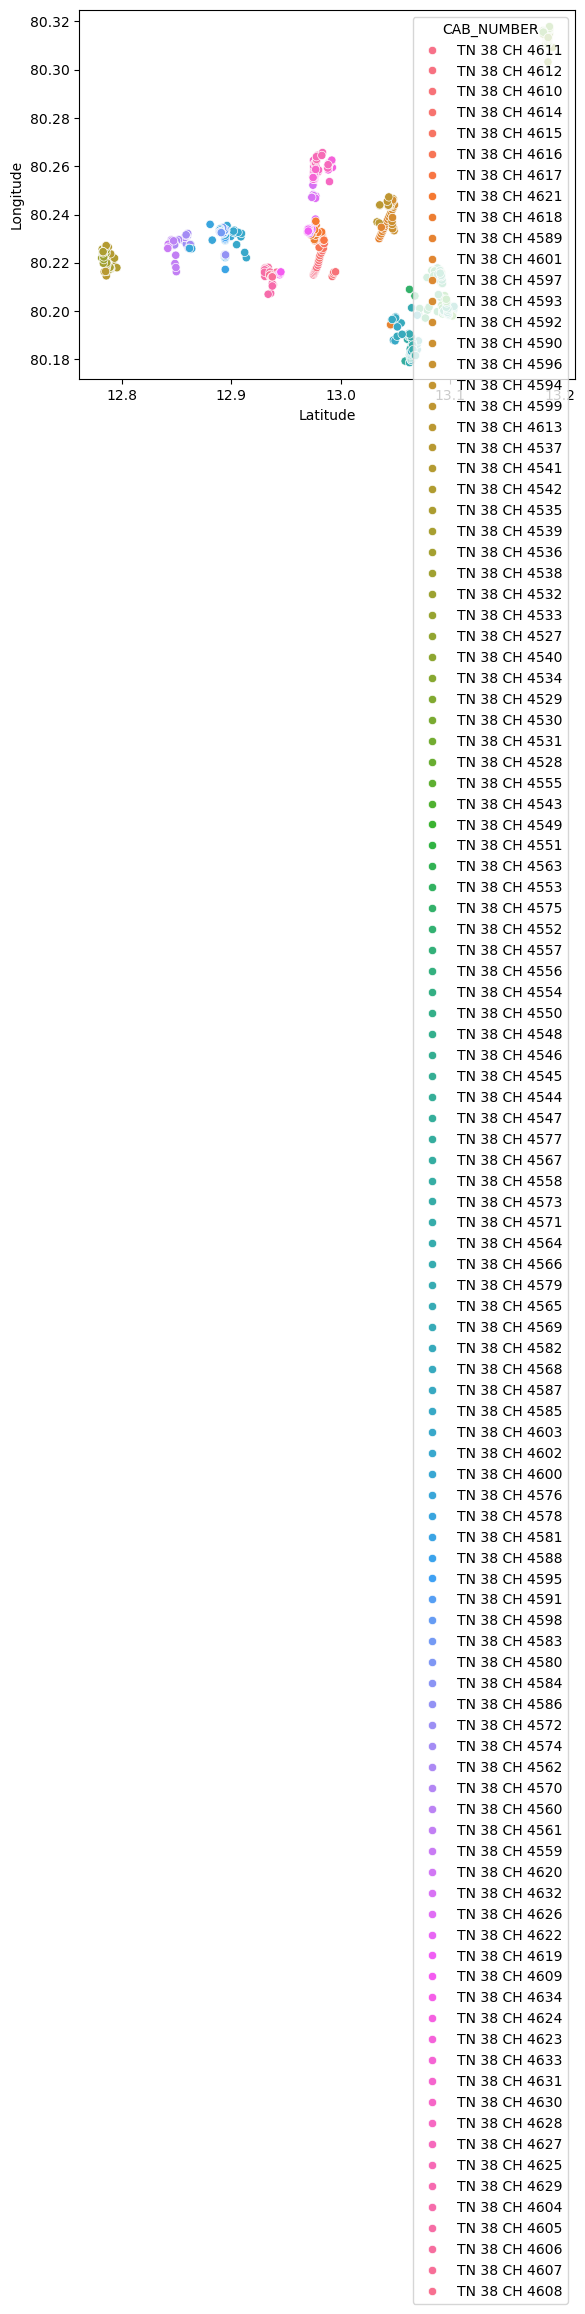

In [ ]:
sns.scatterplot(data=data,x='Latitude',y='Longitude',hue='CAB_NUMBER')

In [ ]:
cab_details_df = cab_details_df.rename(columns={'PHONE': 'DRIVER_PHONE'})

In [ ]:
final_df = pd.merge(data, emp_details_df[['INDEX_ID', 'GENDER','EMPLOYEE_NAME','OFFICE_LOCATION_LAT','OFFICE_LOCATION_LON']], on='INDEX_ID', how='left')
final_df = pd.merge(final_df, cab_details_df[['CAB_NUMBER', 'CAPACITY','CAB_ID','DRIVER_NAME',]], on='CAB_NUMBER', how='left')

In [ ]:
final_df.to_csv("final_clusters.csv", index=False)

In [ ]:
df=pd.read_csv("final_clusters.csv")

In [ ]:
final_df

,INDEX_ID,EMP_ID,Latitude,Longitude,AREA_NAME_EMP,CAB_NUMBER,GENDER,EMPLOYEE_NAME,OFFICE_LOCATION_LAT,OFFICE_LOCATION_LON,CAPACITY,CAB_ID,DRIVER_NAME
0,1.0,VTS2025001,12.9750,80.2150,VELACHERRY,TN 38 CH 4611,Male,Aarav,12.9775,80.2518,5,CAB_085,Vishnu Rao
1,2.0,VTS2025002,12.9755,80.2155,VELACHERRY,TN 38 CH 4611,Female,Ananya,12.9775,80.2518,5,CAB_085,Vishnu Rao
2,3.0,VTS2025003,12.9760,80.2160,VELACHERRY,TN 38 CH 4611,Female,Aditi,12.9775,80.2518,5,CAB_085,Vishnu Rao
3,4.0,VTS2025004,12.9765,80.2165,VELACHERRY,TN 38 CH 4611,Male,Arnav,12.9775,80.2518,5,CAB_085,Vishnu Rao
4,5.0,VTS2025005,12.9770,80.2170,VELACHERRY,TN 38 CH 4611,Male,Vikram,12.9775,80.2518,5,CAB_085,Vishnu Rao


In [ ]:
data = data.dropna(how='all')
center_latitude = 12.9775
center_longitude = 80.2518
radius_km = 25

def is_within_radius(row, center_lat, center_lon, radius):
    center_point = (center_lat, center_lon)
    target_point = (row['DROP_LOCATION_LAT'], row['DROP_LOCATION_LON'])
    distance = great_circle(center_point, target_point).km
    return distance <= radius
data['within_radius'] = data.apply(is_within_radius, axis=1, center_lat=center_latitude, center_lon=center_longitude, radius=radius_km)
data = data[data['within_radius']]
data = data.drop(columns=['within_radius'])

data = data.rename(columns={'DROP_LOCATION_LAT':'Latitude','DROP_LOCATION_LON':'Longitude'})
df = copy.deepcopy(data)
df = df.drop(columns=['EMP_ID','INDEX_ID','AREA_NAME_EMP'])

In [ ]:
cabs_capacity=cab_details_df.CAPACITY.to_list()
cab_numbers = cab_details_df.CAB_NUMBER.to_list()
data = data.rename(columns={'DROP_LOCATION_LAT':'Latitude','DROP_LOCATION_LON':'Longitude'})
n_clusters=len(cabs_capacity)
count=len(cabs_capacity)
drop_lat = 12.9775
drop_long = 80.2518


In [ ]:
df

,Latitude,Longitude
0,12.975000,80.215000
1,12.975500,80.215500
2,12.976000,80.216000
3,12.976500,80.216500
4,12.977000,80.217000
...,...,...
495,12.933569,80.206975
496,12.936762,80.214132
497,12.937072,80.214163
498,12.937372,80.210373


In [ ]:
clustering_model = AgglomerativeClustering(n_clusters=n_clusters, linkage="ward")
clustering_model.fit(df)
labels = clustering_model.labels_
count=len(cabs_capacity)

In [ ]:
employee_data = {}
for i, (index, row) in enumerate(data.iterrows()):
    label = labels[i]
    if label not in employee_data:
        employee_data[label] = [[row['Latitude'], row['Longitude']]]
    else:
        employee_data[label].append([row['Latitude'], row['Longitude']])

In [ ]:
def haversine(lat1, lon1, lat2, lon2):
    lat1, lon1, lat2, lon2 = map(math.radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = math.sin(dlat / 2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon / 2)**2
    c = 2 * math.asin(math.sqrt(a))
    r = 6371
    return c * r

In [ ]:
def remove_indices(points, df):
    indices_to_remove_data = []
    for point in points:
        indices_data = df.index[(df['Latitude'] == point[0]) &
                                (df['Longitude'] == point[1])].tolist()
        indices_to_remove_data.extend(indices_data)
    return indices_to_remove_data

def cluster_form(df,count):
    employee_data = {}
    if len(df) ==0:
        return {}
    if len(df)<2:
        employee_data['1'] = [[df.iloc[0]['Latitude'], df.iloc[0]['Longitude']]]
        return employee_data
    n_clusters = max(1, math.ceil(len(df) / count))
    clustering_model = AgglomerativeClustering(n_clusters=n_clusters, linkage="ward")
    clustering_model.fit(df[['Latitude', 'Longitude']])
    labels = clustering_model.labels_
    employee_data={}

    for i, (index, row) in enumerate(df.iterrows()):
        label = labels[i]
        if label not in employee_data:
            employee_data[label] = [[row['Latitude'], row['Longitude']]]
        else:
            employee_data[label].append([row['Latitude'], row['Longitude']])
    return employee_data

In [ ]:
number = 0
cabs = {}
while employee_data and number < len(cabs_capacity):
    if len(df) < 2:
        remaining_points = df[['Latitude', 'Longitude']].values.tolist()
        cabs[f'cab_{number}'] = remaining_points
        break
    distance_from_centroid = []
    centroids = []
    items_list = list(employee_data.items())
    
    for cluster in employee_data.values():
        if len(cluster) > 1:
            x_coords = [i[0] for i in cluster]
            y_coords = [i[1] for i in cluster]
            centroid = (sum(x_coords) / len(x_coords), sum(y_coords) / len(y_coords))
        else:
            centroid = (cluster[0][0], cluster[0][1])
        centroids.append(centroid)
        from_centroid = haversine(centroid[0], centroid[1], drop_lat, drop_long)
        distance_from_centroid.append(from_centroid)
        
    max_distance = np.argmax(distance_from_centroid)
    max_distance_index, max_distance_values = items_list[max_distance]
    
    if len(max_distance_values) > cabs_capacity[number]:
        distances_in_cluster = [(point, haversine(drop_lat, drop_long, point[0], point[1])) for point in max_distance_values]
        distances_in_cluster = sorted(distances_in_cluster, key=lambda x: x[1],reverse=True)
        max_distance_in_cluster=[d[0] for d in distances_in_cluster][0]
        distances_from_distance_in_cluster = [(point, haversine(max_distance_in_cluster[0], max_distance_in_cluster[1], point[0], point[1])) for point in max_distance_values]
        distances_from_distance_in_cluster = sorted(distances_from_distance_in_cluster, key=lambda x: x[1])
        distances_from_distance_in_cluster = [d[0] for d in distances_from_distance_in_cluster[:cabs_capacity[number]]]
        cabs[cab_numbers[number]] = distances_from_distance_in_cluster
        cabs_capacity[number]=0
        number += 1
        count-=1
        indices_to_remove_data = remove_indices(distances_from_distance_in_cluster, df)
        remaining_points=[point for point in distances_in_cluster if point not in distances_from_distance_in_cluster]
        df = df.drop(indices_to_remove_data, errors='ignore')
        employee_data[max_distance_index] = remaining_points
        employee_data = cluster_form(df,count)
        
    elif len(max_distance_values) == cabs_capacity[number]:
        cabs[cab_numbers[number]] = max_distance_values
        cabs_capacity[number]=0
        indices_to_remove_data = remove_indices(max_distance_values, df)
        del employee_data[max_distance_index]
        number += 1
        count-=1
        df = df.drop(indices_to_remove_data, errors='ignore')
        employee_data = cluster_form(df,count)
    
    elif len(max_distance_values) < cabs_capacity[number]:
        cabs[cab_numbers[number]] = max_distance_values
        cabs_capacity[number] -= len(max_distance_values)
        indices_to_remove_data = remove_indices(max_distance_values, df)
        del employee_data[max_distance_index]
        df = df.drop(indices_to_remove_data, errors='ignore')
        if df.empty:
            break
        
        remaining_points = df[['Latitude', 'Longitude']].values.tolist()
        x_coords = [i[0] for i in max_distance_values]
        y_coords = [i[1] for i in max_distance_values]
        c = (sum(x_coords) / len(x_coords), sum(y_coords) / len(y_coords))
        
        remaining = [(point, haversine(c[0], c[1], point[0], point[1])) for point in remaining_points]
        remaining = sorted(remaining, key=lambda x: x[1])
        remaining = [d[0] for d in remaining[:cabs_capacity[number]]]
        cabs[cab_numbers[number]].extend(remaining)
        cabs_capacity[number] = 0
        indices_to_remove_data = remove_indices(remaining, df)
        df = df.drop(indices_to_remove_data, errors='ignore')
        number += 1
        count-=1
        employee_data = cluster_form(df,count)

In [ ]:
def find_cab_key(lat, lon, cab_dict):
    for key, locations in cab_dict.items():
        for loc in locations:
            if [lat, lon] == loc:
                return key

data['CAB_NUMBER'] = data.apply(lambda row: find_cab_key(row['Latitude'], row['Longitude'], cabs), axis=1)

<Axes: xlabel='Latitude', ylabel='Longitude'>

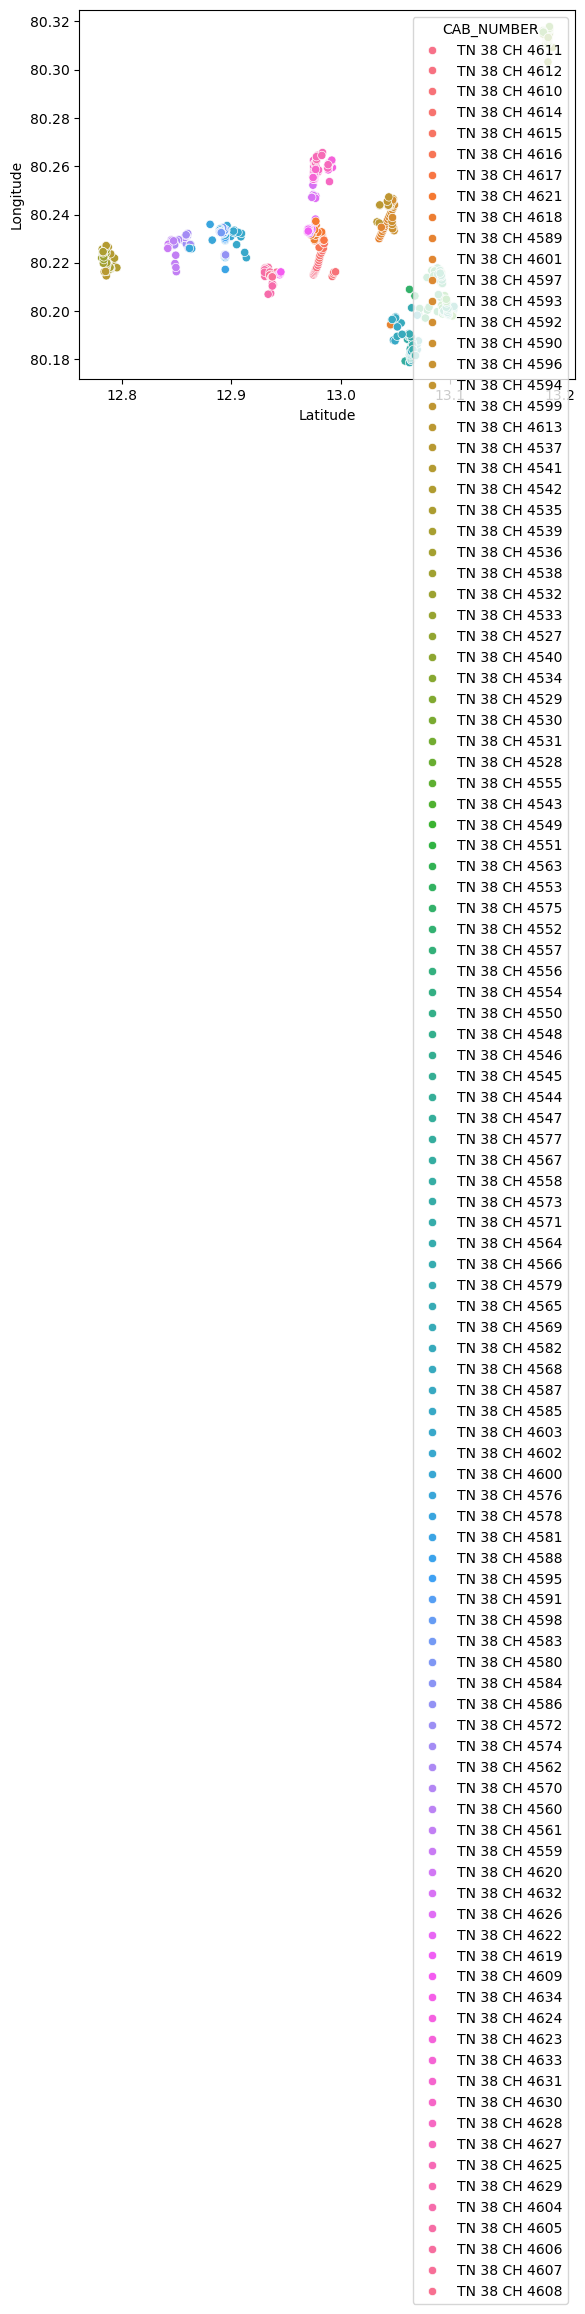

In [ ]:
sns.scatterplot(data=data,x='Latitude',y='Longitude',hue='CAB_NUMBER')

In [ ]:
cab_details_df = cab_details_df.rename(columns={'PHONE': 'DRIVER_PHONE'})

In [ ]:
final_df = pd.merge(data, emp_details_df[['INDEX_ID', 'GENDER','EMPLOYEE_NAME','OFFICE_LOCATION_LAT','OFFICE_LOCATION_LON']], on='INDEX_ID', how='left')
final_df = pd.merge(final_df, cab_details_df[['CAB_NUMBER', 'CAPACITY','CAB_ID','DRIVER_NAME',]], on='CAB_NUMBER', how='left')

In [ ]:
final_df.to_csv("final_clusters.csv", index=False)

In [ ]:
df=pd.read_csv("final_clusters.csv")

In [ ]:
final_df

,INDEX_ID,EMP_ID,Latitude,Longitude,AREA_NAME_EMP,CAB_NUMBER,GENDER,EMPLOYEE_NAME,OFFICE_LOCATION_LAT,OFFICE_LOCATION_LON,CAPACITY,CAB_ID,DRIVER_NAME
0,1.0,VTS2025001,12.9750,80.2150,VELACHERRY,TN 38 CH 4611,Male,Aarav,12.9775,80.2518,5,CAB_085,Vishnu Rao
1,2.0,VTS2025002,12.9755,80.2155,VELACHERRY,TN 38 CH 4611,Female,Ananya,12.9775,80.2518,5,CAB_085,Vishnu Rao
2,3.0,VTS2025003,12.9760,80.2160,VELACHERRY,TN 38 CH 4611,Female,Aditi,12.9775,80.2518,5,CAB_085,Vishnu Rao
3,4.0,VTS2025004,12.9765,80.2165,VELACHERRY,TN 38 CH 4611,Male,Arnav,12.9775,80.2518,5,CAB_085,Vishnu Rao
4,5.0,VTS2025005,12.9770,80.2170,VELACHERRY,TN 38 CH 4611,Male,Vikram,12.9775,80.2518,5,CAB_085,Vishnu Rao
